In [1]:
import numpy as np
import pandas as pd

# Load back the arrays of features
A_ = pd.read_csv('A1.csv').to_numpy()
B_ = pd.read_csv('B1.csv').to_numpy()
C_ = pd.read_csv('C1.csv').to_numpy()
D_ = pd.read_csv('D1.csv').to_numpy()


# Check shapes
print("A_array:", A_.shape)
print("B_array:", B_.shape)
print("C_array:", C_.shape)
print("D_array:", D_.shape)


A_array: (41, 21)
B_array: (635, 21)
C_array: (5954, 21)
D_array: (993, 21)


In [2]:
# on position  0, 5, 4, 20, 19 are Bm, Rel_e, e2, R_DOL, Age

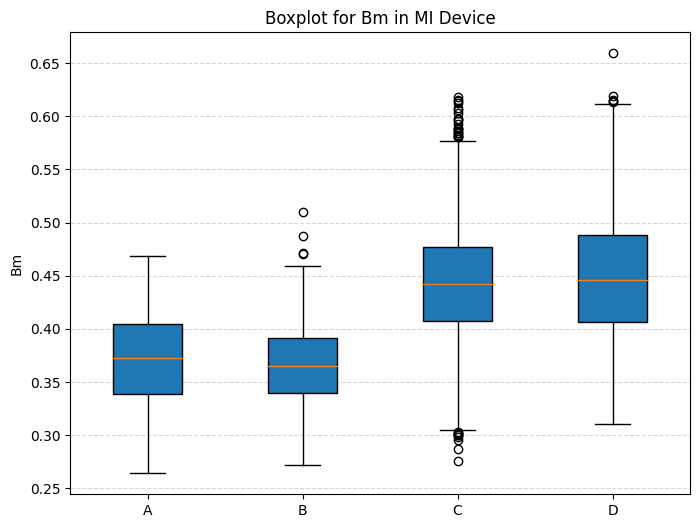

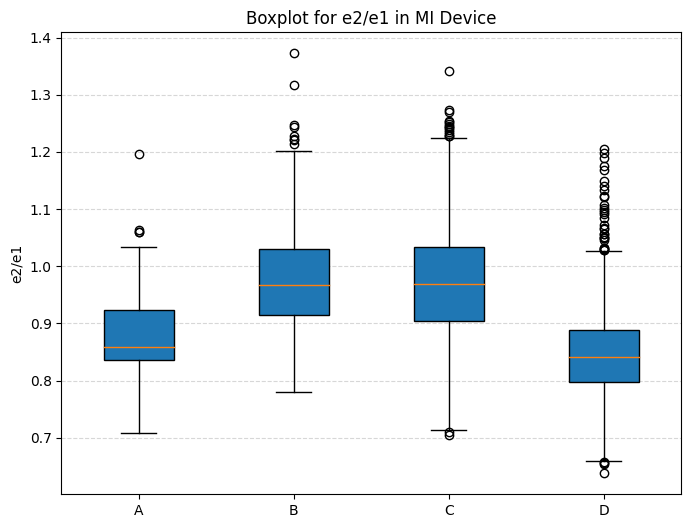

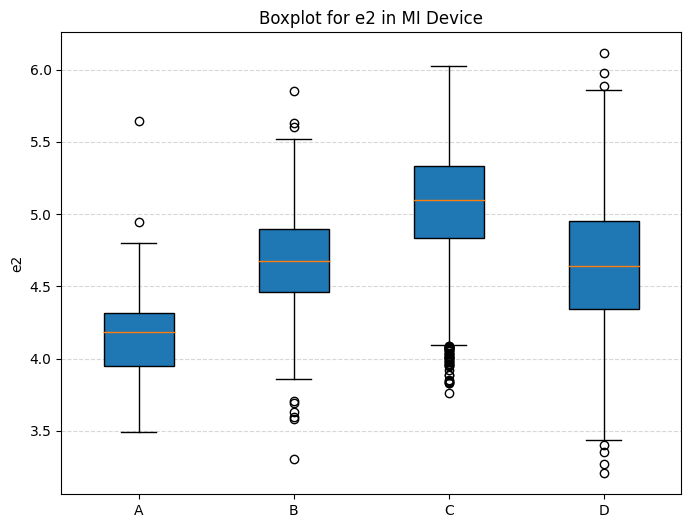

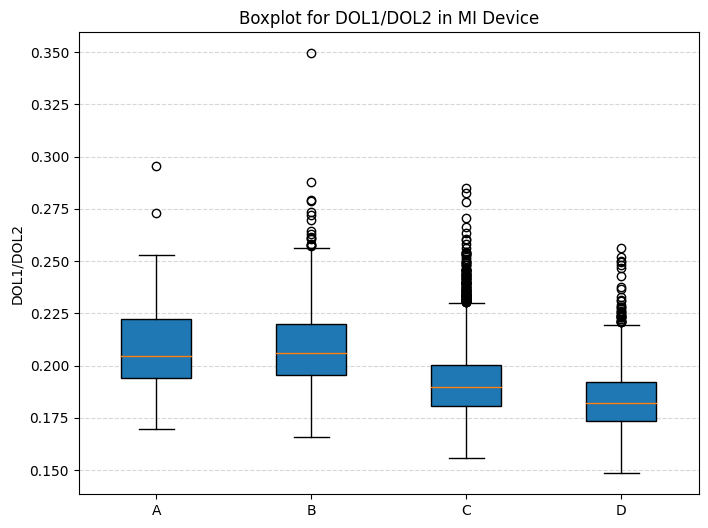

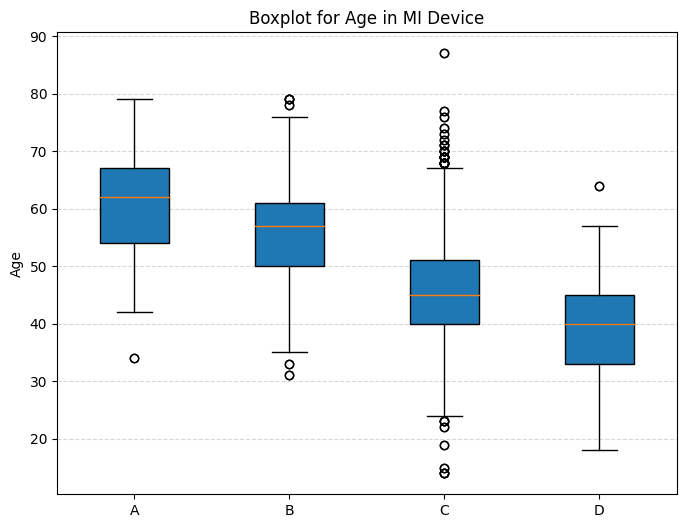

In [3]:
import matplotlib.pyplot as plt

feature_names = [
    "Bm", "DOL1", "DOL2", "e1", "e2", "e2/e1", "e3", "e4", "E",
    "Q", "Q1", "Q2", "vmaxL", "vmaxR", "vmax" , "L1", "D1", "L2", "D2",
    "Age", "DOL1/DOL2"
]

# Selected feature indices
selected_indices = [0, 5, 4, 20, 19]

assert A_.shape[1] >= len(feature_names), "Not enough columns in A, B, C, or D arrays."

# Plot only selected features
for i in selected_indices:
    name = feature_names[i]
    plt.figure(figsize=(8, 6))
    plt.boxplot([A_[:, i], B_[:, i], C_[:, i], D_[:, i]], 
                labels=['A', 'B', 'C', 'D'], 
                patch_artist=True)
    
    plt.title(f"Boxplot for {name} in MI Device")
    plt.ylabel(name)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    #0, 4, 8, 7, 11


# 1
### ANOVA (one-way) tests for each pairs in Bm coeficient

In [4]:
from scipy.stats import f_oneway

pairs = [
    ('A-B', A_[:,0], B_[:,0]),
    ('A-C', A_[:,0], C_[:,0]),
    ('A-D', A_[:,0], D_[:,0]),
    ('B-C', B_[:,0], C_[:,0]),
    ('B-D', B_[:,0], D_[:,0]),
    ('C-D', C_[:,0], D_[:,0])
]

# Perform ANOVA for each pair
for name, x, y in pairs:
    f_stat, p_val = f_oneway(x, y)
    print(f'ANOVA {name}: F-statistic = {f_stat:.4f}, p-value = {p_val:.4e}')


ANOVA A-B: F-statistic = 0.7407, p-value = 3.8975e-01
ANOVA A-C: F-statistic = 79.5306, p-value = 6.2082e-19
ANOVA A-D: F-statistic = 72.0275, p-value = 7.2948e-17
ANOVA B-C: F-statistic = 1352.3482, p-value = 1.9188e-269
ANOVA B-D: F-statistic = 1031.6664, p-value = 1.0556e-175
ANOVA C-D: F-statistic = 13.7556, p-value = 2.0982e-04


#### Analzsis for Bm -> Threshold = 75th percentile on first (min) class

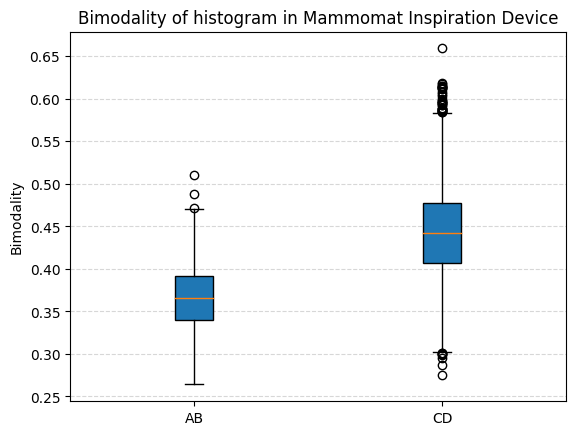

<Figure size 600x500 with 0 Axes>

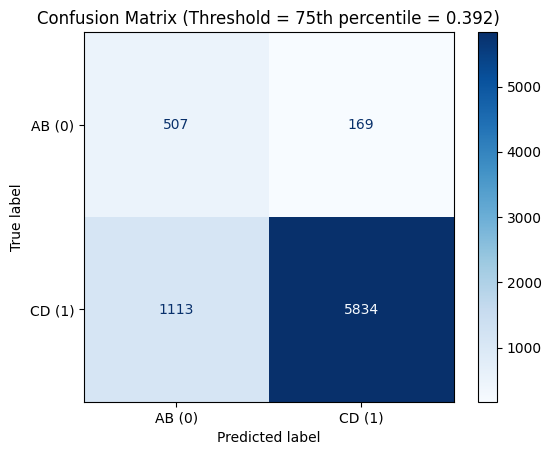

Threshold (75th percentile of AB): 0.392
Confusion Matrix:
 [[ 507  169]
 [1113 5834]]
Accuracy : 0.8318
Precision: 0.9718
Recall   : 0.8398
F1-score : 0.9010


In [5]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)


AB = np.concatenate((A_[:,0], B_[:,0]), axis = 0)
CD = np.concatenate((C_[:,0], D_[:,0]), axis = 0)


plt.boxplot([AB, CD], labels=['AB', 'CD'], patch_artist=True)

plt.title("Bimodality of histogram in Mammomat Inspiration Device")
plt.ylabel("Bimodality")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


###################3
# Compute threshold (75th percentile of AB)
threshold = np.percentile(AB, 75)

# True labels (AB = 0, CD = 1)
y_true = np.concatenate((
    np.zeros(len(AB)),
    np.ones(len(CD))
))

# Predictions (based on threshold)
y_pred = np.concatenate((
    (AB >= threshold).astype(int),
    (CD >= threshold).astype(int)
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AB (0)', 'CD (1)'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (Threshold = 75th percentile = {threshold:.3f})")
plt.show()

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print(f"Threshold (75th percentile of AB): {threshold:.3f}")
print("Confusion Matrix:\n", cm)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")



# 2
### ANOVA (one-way) tests for each pairs in R_DOL coeficient

In [14]:
pairs = [
    ('A-B', A_[:,20], B_[:,20]),
    ('A-C', A_[:,20], C_[:,20]),
    ('A-D', A_[:,20], D_[:,20]),
    ('B-C', B_[:,20], C_[:,20]),
    ('B-D', B_[:,20], D_[:,20]),
    ('C-D', C_[:,20], D_[:,20])
]

for name, x, y in pairs:
    f_stat, p_val = f_oneway(x, y)
    print(f'ANOVA {name}: F-statistic = {f_stat:.4f}, p-value = {p_val:.4e}')

ANOVA A-B: F-statistic = 0.1769, p-value = 6.7422e-01
ANOVA A-C: F-statistic = 57.2937, p-value = 4.3210e-14
ANOVA A-D: F-statistic = 104.9275, p-value = 1.6180e-23
ANOVA B-C: F-statistic = 654.6898, p-value = 9.5251e-138
ANOVA B-D: F-statistic = 771.4891, p-value = 2.7594e-139
ANOVA C-D: F-statistic = 199.4763, p-value = 1.1237e-44


#### Analzsis for R_DOL -> Threshold = 75th percentile on first (min) class

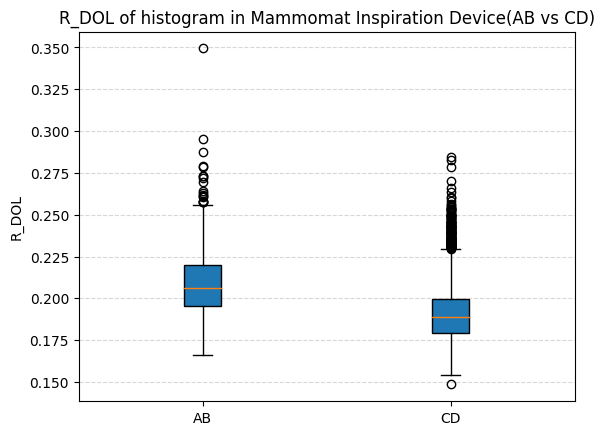

<Figure size 600x500 with 0 Axes>

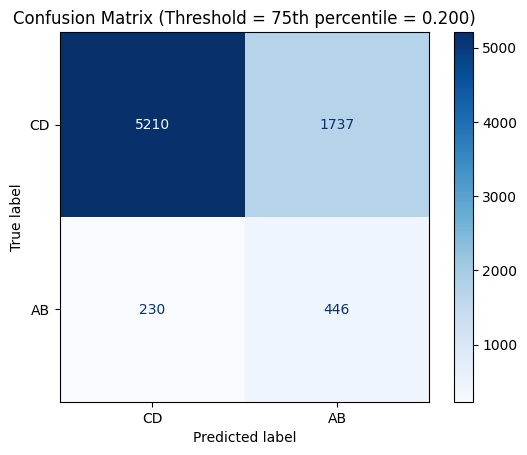

Threshold (75th percentile of CD): 0.200
Confusion Matrix:
 [[5210 1737]
 [ 230  446]]
Accuracy : 0.7420
Precision: 0.2043
Recall   : 0.6598
F1-score : 0.3120


In [7]:
AB = np.concatenate((A_[:,20], B_[:,20]), axis = 0)
CD = np.concatenate((C_[:,20], D_[:,20]), axis = 0)

plt.boxplot([AB, CD], labels=['AB', 'CD'], patch_artist=True)

plt.title("R_DOL of histogram in Mammomat Inspiration Device(AB vs CD)")
plt.ylabel("R_DOL")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



threshold = np.percentile(CD, 75)

y_true = np.concatenate((
    np.zeros(len(CD)),
    np.ones(len(AB))
))

y_pred = np.concatenate((
    (CD >= threshold).astype(int),
    (AB >= threshold).astype(int)
))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CD', 'AB'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (Threshold = 75th percentile = {threshold:.3f})")
plt.show()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Threshold (75th percentile of CD): {threshold:.3f}")
print("Confusion Matrix:\n", cm)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

###########################################################3

# 3
### ANOVA (one-way) tests for each pairs in e2 coeficient

In [8]:
pairs = [
    ('A-B', A_[:,4], B_[:,4]),
    ('A-C', A_[:,4], C_[:,4]),
    ('A-D', A_[:,4], D_[:,4]),
    ('B-C', B_[:,4], C_[:,4]),
    ('B-D', B_[:,4], D_[:,4]),
    ('C-D', C_[:,4], D_[:,4])
]

# ANOVA 
for name, x, y in pairs:
    f_stat, p_val = f_oneway(x, y)
    print(f'ANOVA {name}: F-statistic = {f_stat:.4f}, p-value = {p_val:.4e}')

ANOVA A-B: F-statistic = 74.4429, p-value = 4.4657e-17
ANOVA A-C: F-statistic = 239.7143, p-value = 4.7817e-53
ANOVA A-D: F-statistic = 36.1656, p-value = 2.5126e-09
ANOVA B-C: F-statistic = 688.9319, p-value = 1.6651e-144
ANOVA B-D: F-statistic = 3.4913, p-value = 6.1872e-02
ANOVA C-D: F-statistic = 1123.8049, p-value = 1.6621e-228


#### Analzsis for e2 -> Threshold = 75th percentile on first (min) class

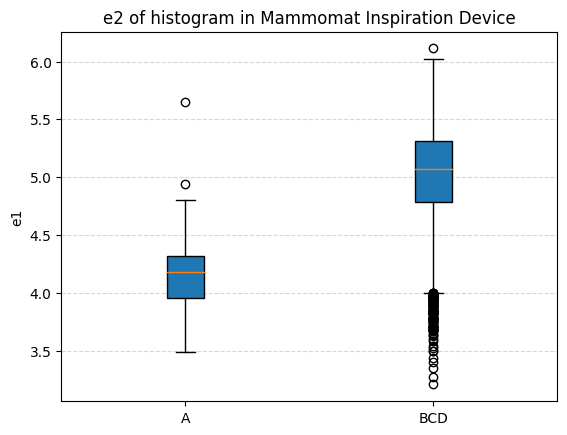

<Figure size 600x500 with 0 Axes>

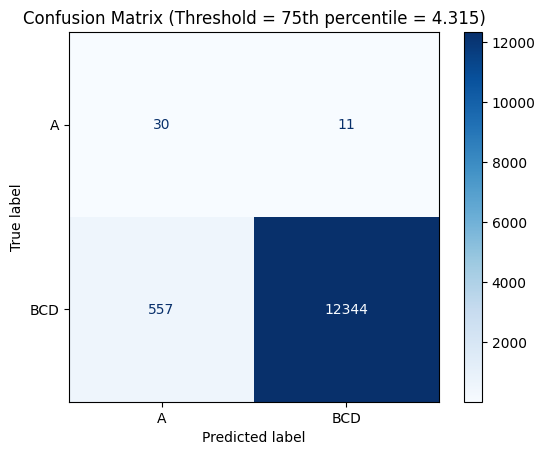

Threshold (75th percentile of A): 4.315
Confusion Matrix:
 [[   30    11]
 [  557 12344]]
Accuracy : 0.9561
Precision: 0.9991
Recall   : 0.9568
F1-score : 0.9775


In [9]:

A = A_[:,4]
BCD = np.concatenate((C_[:,4], C_[:,4], D_[:,4]), axis = 0)


plt.boxplot([A, BCD], labels=['A', 'BCD'], patch_artist=True)

plt.title("e2 of histogram in Mammomat Inspiration Device")
plt.ylabel("e1")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


threshold = np.percentile(A, 75)

y_true = np.concatenate((
    np.zeros(len(A)),
    np.ones(len(BCD))
))

y_pred = np.concatenate((
    (A >= threshold).astype(int),
    (BCD >= threshold).astype(int)
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'BCD'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (Threshold = 75th percentile = {threshold:.3f})")
plt.show()

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Threshold (75th percentile of A): {threshold:.3f}")
print("Confusion Matrix:\n", cm)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")



# 4
### ANOVA (one-way) tests for each pairs in Rel_e coeficient

In [10]:
pairs = [
    ('A-B', A_[:,5], B_[:,5]),
    ('A-C', A_[:,5], C_[:,5]),
    ('A-D', A_[:,5], D_[:,5]),
    ('B-C', B_[:,5], C_[:,5]),
    ('B-D', B_[:,5], D_[:,5]),
    ('C-D', C_[:,5], D_[:,5])
]

for name, x, y in pairs:
    f_stat, p_val = f_oneway(x, y)
    print(f'ANOVA {name}: F-statistic = {f_stat:.4f}, p-value = {p_val:.4e}')

ANOVA A-B: F-statistic = 35.8801, p-value = 3.4145e-09
ANOVA A-C: F-statistic = 32.8016, p-value = 1.0702e-08
ANOVA A-D: F-statistic = 9.9739, p-value = 1.6339e-03
ANOVA B-C: F-statistic = 1.2235, p-value = 2.6872e-01
ANOVA B-D: F-statistic = 887.3152, p-value = 5.7827e-156
ANOVA C-D: F-statistic = 1588.9201, p-value = 4.3582e-313


#### Analzsis for Rel_e -> Threshold = 75th percentile on first (min) (class for *A vs B and *C vs D)

Report for A vs B


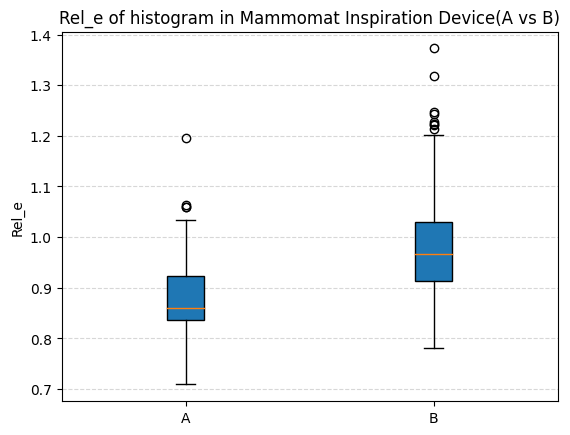

<Figure size 600x500 with 0 Axes>

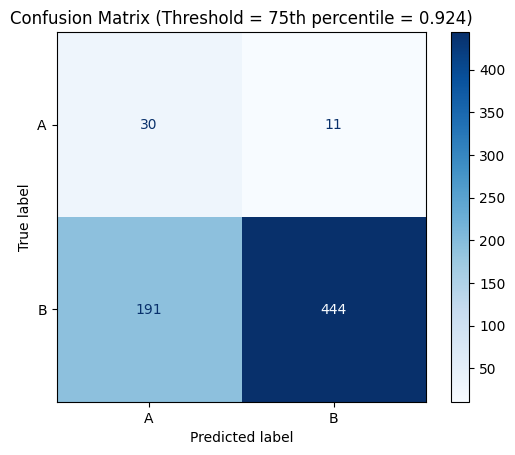

Threshold (75th percentile of A): 0.924
Confusion Matrix:
 [[ 30  11]
 [191 444]]
Accuracy : 0.7012
Precision: 0.9758
Recall   : 0.6992
F1-score : 0.8147
Report for C vs D


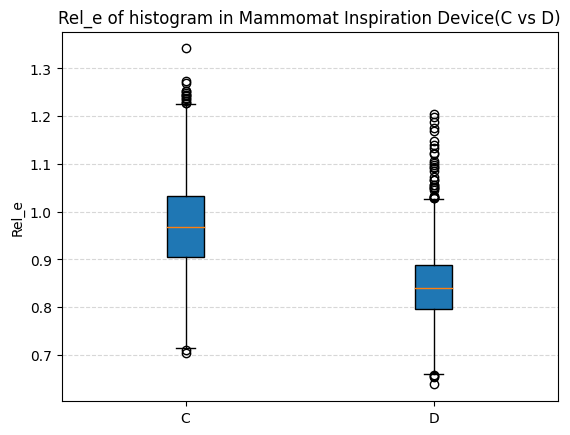

<Figure size 600x500 with 0 Axes>

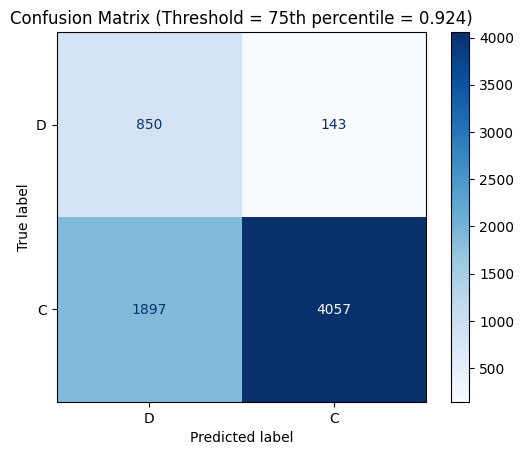

Threshold (75th percentile of D): 0.924
Confusion Matrix:
 [[ 850  143]
 [1897 4057]]
Accuracy : 0.7063
Precision: 0.9660
Recall   : 0.6814
F1-score : 0.7991
Report for AD vs CB


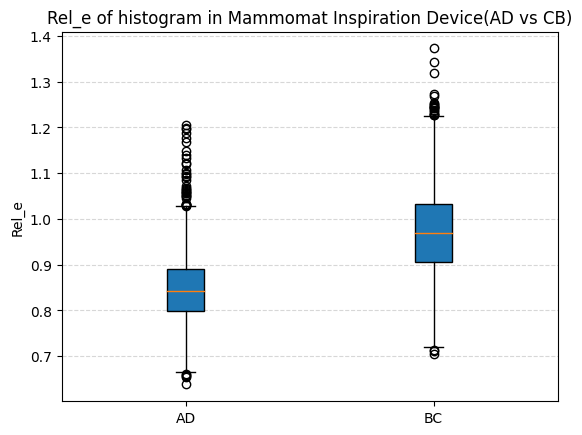

<Figure size 600x500 with 0 Axes>

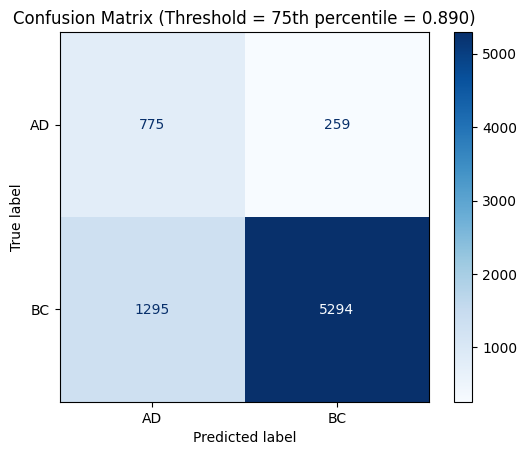

Threshold (75th percentile of AD): 0.890
Confusion Matrix:
 [[ 775  259]
 [1295 5294]]
Accuracy : 0.7961
Precision: 0.9534
Recall   : 0.8035
F1-score : 0.8720


In [11]:
print("Report for A vs B")

A = A_[:,5]
B = B_[:,5]


plt.boxplot([A, B], labels=['A', 'B'], patch_artist=True)

plt.title("Rel_e of histogram in Mammomat Inspiration Device(A vs B)")
plt.ylabel("Rel_e")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



threshold = np.percentile(A, 75)

y_true = np.concatenate((
    np.zeros(len(A)),
    np.ones(len(B))
))

y_pred = np.concatenate((
    (A >= threshold).astype(int),
    (B >= threshold).astype(int)
))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (Threshold = 75th percentile = {threshold:.3f})")
plt.show()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Threshold (75th percentile of A): {threshold:.3f}")
print("Confusion Matrix:\n", cm)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

###########################################################3

print("Report for C vs D")

C = C_[:,5]
D = D_[:,5]


plt.boxplot([C, D], labels=['C', 'D'], patch_artist=True)

plt.title("Rel_e of histogram in Mammomat Inspiration Device(C vs D)")
plt.ylabel("Rel_e")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



threshold = np.percentile(A, 75)

y_true = np.concatenate((
    np.zeros(len(D)),
    np.ones(len(C))
))

y_pred = np.concatenate((
    (D >= threshold).astype(int),
    (C >= threshold).astype(int)
))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['D', 'C'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (Threshold = 75th percentile = {threshold:.3f})")
plt.show()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Threshold (75th percentile of D): {threshold:.3f}")
print("Confusion Matrix:\n", cm)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")


###########################################################3

print("Report for AD vs CB")
AD = np.concatenate((A_[:,5], D_[:,5]), axis = 0)
BC = np.concatenate((B_[:,5], C_[:,5]), axis = 0)

plt.boxplot([AD, BC], labels=['AD', 'BC'], patch_artist=True)

plt.title("Rel_e of histogram in Mammomat Inspiration Device(AD vs CB)")
plt.ylabel("Rel_e")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



threshold = np.percentile(AD, 75)

y_true = np.concatenate((
    np.zeros(len(AD)),
    np.ones(len(BC))
))

y_pred = np.concatenate((
    (AD >= threshold).astype(int),
    (BC >= threshold).astype(int)
))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AD', 'BC'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (Threshold = 75th percentile = {threshold:.3f})")
plt.show()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Threshold (75th percentile of AD): {threshold:.3f}")
print("Confusion Matrix:\n", cm)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

###########################################################3


# 5
### ANOVA (one-way) tests for each pairs in Age coeficient

In [12]:
pairs = [
    ('A-B', A_[:,19], B_[:,19]),
    ('A-C', A_[:,19], C_[:,19]),
    ('A-D', A_[:,19], D_[:,19]),
    ('B-C', B_[:,19], C_[:,19]),
    ('B-D', B_[:,19], D_[:,19]),
    ('C-D', C_[:,19], D_[:,19])
]

# ANOVA for each pair
for name, x, y in pairs:
    f_stat, p_val = f_oneway(x, y)
    print(f'ANOVA {name}: F-statistic = {f_stat:.4f}, p-value = {p_val:.4e}')

ANOVA A-B: F-statistic = 8.8439, p-value = 3.0457e-03
ANOVA A-C: F-statistic = 126.9436, p-value = 3.7476e-29
ANOVA A-D: F-statistic = 270.5736, p-value = 3.5926e-54
ANOVA B-C: F-statistic = 909.8137, p-value = 2.4627e-187
ANOVA B-D: F-statistic = 1621.6220, p-value = 1.5315e-246
ANOVA C-D: F-statistic = 493.6012, p-value = 1.0537e-105


#### Analzsis for Age -> Threshold = 75th percentile on first (min) class

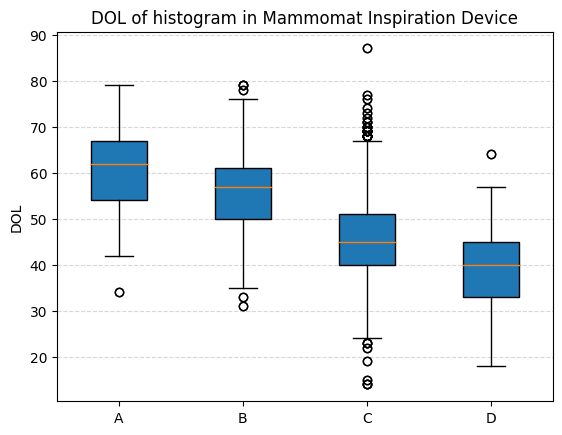

<Figure size 600x500 with 0 Axes>

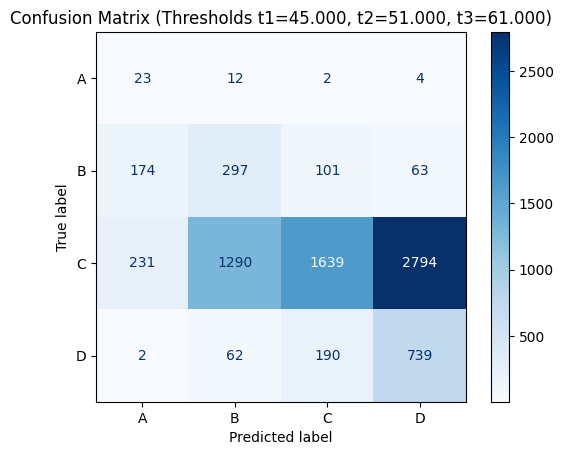

Thresholds: t1(D)=45.000, t2(C)=51.000, t3(B)=61.000
Confusion Matrix:
 [[  23   12    2    4]
 [ 174  297  101   63]
 [ 231 1290 1639 2794]
 [   2   62  190  739]]
Accuracy : 0.3539
Precision: 0.3215
Recall   : 0.5120
F1-score : 0.2735


In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

# data for AGE
A = A_[:,19]
B = B_[:,19]
C = C_[:,19]
D = D_[:,19]

plt.boxplot([A, B, C, D], labels=['A', 'B', 'C', 'D'], patch_artist=True)
plt.title("Age of histogram in Mammomat Inspiration Device")
plt.ylabel("Age")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# thresholds (75th percentiles for hg class)
t1 = np.percentile(D, 75)
t2 = np.percentile(C, 75)
t3 = np.percentile(B, 75)


all_values = np.concatenate([A, B, C, D])
y_true = np.concatenate([
    np.full(len(A), 0),  # A = 0
    np.full(len(B), 1),  # B = 1
    np.full(len(C), 2),  # C = 2
    np.full(len(D), 3)   # D = 3
])

y_pred = []
for val in all_values:
    if val < t1:
        y_pred.append(3)  # D
    elif val < t2:
        y_pred.append(2)  # C
    elif val < t3:
        y_pred.append(1)  # B
    else:
        y_pred.append(0)  # A

y_pred = np.array(y_pred)

labels = ['A', 'B', 'C', 'D']
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (Thresholds t1={t1:.3f}, t2={t2:.3f}, t3={t3:.3f})")
plt.show()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Thresholds: t1(D)={t1:.3f}, t2(C)={t2:.3f}, t3(B)={t3:.3f}")
print("Confusion Matrix:\n", cm)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
